In [53]:
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import itertools




In [61]:
def vqc_layer_ansatz(
    qubits,
    circ,
    parameters,
    layers = 2,
    entangler = "full" # "full" or "linear"
    ):

    for layer in range(layers):

        for d in range (0, len(qubits)):
            circ.rx(parameters[layer][d], qubits[d])
            circ.ry(parameters[layer][d], qubits[d])
            circ.rz(parameters[layer][d+len(qubits)], qubits[d])
            circ.h(qubits[d])

        circ.barrier()
        if entangler == "full":
            for i, j in itertools.combinations(qubits, 2):
                circ.cx(qubits[i], qubits[j])

        circ.barrier()

    for d in range (0, len(qubits)):
        circ.rx(parameters[layer][d], qubits[d])

    #circ.measure_all()
    #circ.measure()
    for n in range(len(qubits)-1):
        circ.measure(n, n)

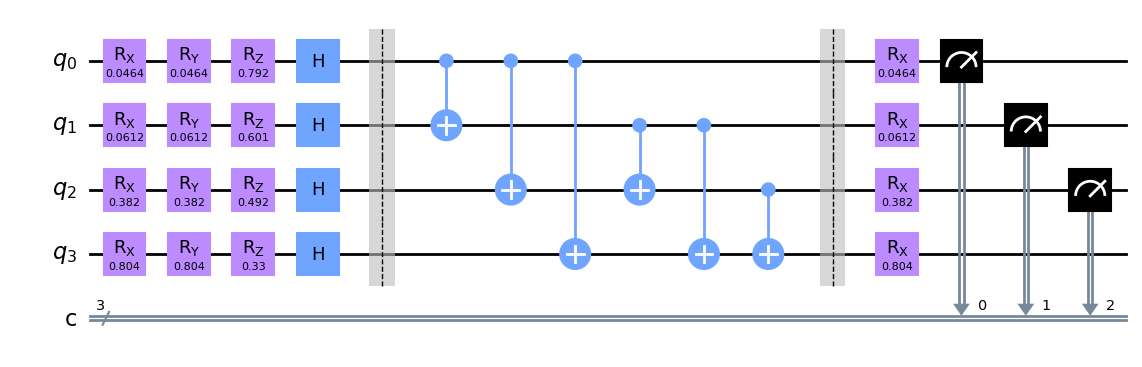

In [62]:
n_qubit = 4
layers  = 1
circ = QuantumCircuit(n_qubit,n_qubit-1)
vqc_layer_ansatz(qubits = list(range(n_qubit)),
           circ = circ,
           parameters = np.random.rand(layers+1, n_qubit*2),
           layers = layers,
           entangler = "full")
circ.draw(output='mpl', fold = 25)